In [1]:
import pandas as pd
df = pd.read_csv('../data/iris/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
# 처음 40행 제거
df2 = df.drop(df.index[range(40)])
df2.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [3]:
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df2[cols]
y = df2['Species']
df2.Species.value_counts() # 불균형 데이터셋

1    50
2    50
0    10
Name: Species, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'iris\n (0: setosa, 1:versicolor, 2:virginica)')

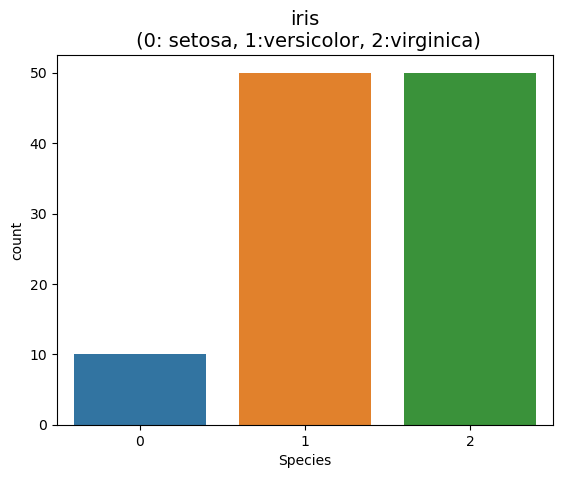

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Species', data=df2)
plt.title('iris\n (0: setosa, 1:versicolor, 2:virginica)', fontsize=14)

In [5]:
# 불균형 데이터셋의 경우 언더샘플링 또는 오버샘플링을 하는 것이 일반적인 방법이지만
# 여기서는 class_weight 속성을 알아보기 위해 샘플링 과정을 생략함
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

1    40
2    40
0     8
Name: Species, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# 기본 옵션 : 모든 클래스에 1이 부여됨(가중치 없음)
logit1 = LogisticRegression(random_state=0)

# 샘플수에 반비례하는 가중치를 n_samples / (n_classes * np.bincount (y))로 자동 조정
logit2 = LogisticRegression(random_state=0, class_weight='balanced')

# 가중치를 직접 입력하는 옵션
logit3 = LogisticRegression(random_state=0, class_weight={0:3, 1:1, 2:2})
print(np.bincount(y)) # 샘플의 개수(10/50/50) # class_weight='balanced'일 경우 샘플 개수에 반비례하는 가중치가 곱해짐
print(88 / (3 * np.bincount(y))) # n_samples / (n_classes * np.bincount (y))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [7]:
for logit in [logit1, logit2, logit3]:
    logit.fit(X_train, y_train)
    print(logit)
    print("학습용:", logit.score(X_train, y_train))
    print("검증용:", logit.score(X_test, y_test))
    print()
# logit3 모형은 class 0의 샘플수가 너무 적으므로 경고 메시지가 출력될 수 있음

LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

